# Kaggle Housing Data Regression Modeling:
# Lasso, Ridge, Elastic Net, Random Forest, Gradient Boosting, and Extra Trees

The data for this project can be found here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

For my analysis, I chose to run Lasso, Ridge, Elastic Net, Random Forest, Gradient Boosting, and Extra Trees all to find the best Sales Price. 

I wont go too into the EDA or the feature transformation but I will note that for the categorical variables I chose to use a label encoder to transform the data. I also chose not to scale my data, aside from transform my dependent variable by logging it. One of the features I created became useful in the final analysis: Year_remod_to_sold which is the difference between the year the house was sold and the year the house was remodeled.


I used 10 fold cross validation with my scorer being RMSE. The results look as follows:

---------------------Training Results---------------------

Linear RMSE on Training set : 0.15764026215163462

Ridge RMSE on Training set : 0.15746970888679512

Lasso RMSE on Training set : 0.19089317397330396

Elastic RMSE on Training set : 0.17930863839215605

Forest RMSE on Training set : 0.13832228372999542

Grad RMSE on Training set : 0.12932241697288385

Extra RMSE on Training set : 0.138099251934426

---------------------Training Results---------------------

Linear RMSE on Test set : 0.18009926350925837

Ridge RMSE on Test set : 0.17246694209250096

Lasso RMSE on Test set : 0.19376724106332208

Elastic RMSE on Test set : 0.18053045815927488

ForestRMSE on Test set : 0.17279075904414107

Grad RMSE on Test set : 0.16427700178695887

Extra RMSE on Test set : 0.1693117219192167

The Two models we will use are Grad and Extra Trees.

Regarding the management problem of the modeling methods examined in my study, I would recommend Gradient Boosting and Extra Random Trees, as they both performed the best in the analysis, and I have comfort in explaining how they function to management.  

The explanatory variables are most important in predicting home prices based on the data set are as follows(using gini index)

Gradient Boosting:

Variable    Gini-importance

TotalArea	0.129538

OverallQual	0.122100

GrLivArea	0.111858

Extra Trees:

Variable        	Gini-importance

OverallQual	        0.103501

TotalArea	        0.067969

Year_remod_to_sold	0.060345

# Appendix

In [1]:
#Data Frames
import pandas as pd ##DataFrame
import numpy as np ##Numerical Package
from math import sqrt

#Plots and data prep
from matplotlib import pyplot
from scipy import stats
from scipy.stats import norm
import matplotlib as ptl
import matplotlib.pyplot as plt ##Plots
import seaborn as sns ##seaborn visuals
import pandas_profiling
%matplotlib inline
sns.set()

#Scikit Learn
import sklearn as sk ##Scikit learn
import sklearn.linear_model  
from sklearn.model_selection import train_test_split #train test split
from sklearn.model_selection import cross_val_score #Cross validation
from sklearn import metrics

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet # modeling package
from sklearn.metrics import mean_squared_error, make_scorer #Scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor # tree packages

from sklearn.preprocessing import StandardScaler #Scaling
from sklearn.preprocessing import OneHotEncoder #Encoding
from sklearn.pipeline import Pipeline #pipeline
from sklearn.compose import ColumnTransformer #column trnaformer
from sklearn.impute import SimpleImputer #impute values

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_train = pd.read_csv("C:/Users/stanma02/Desktop/Code Base 422/Assignment 4/train.csv")
raw_test = pd.read_csv("C:/Users/stanma02/Desktop/Code Base 422/Assignment 4/test.csv")

In [3]:
# Make a copy to avoid modifying the original dataset
df3 = raw_train.copy()
df4 = raw_test.copy()

#combine datasets for missing values
y_train= df3['SalePrice']
df3.drop(['SalePrice'],axis=1,inplace=True)
EDA_train= df3.append(df4)

## Handle Missing Values and Feature Transformation

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64
Number of variables missing data: 34


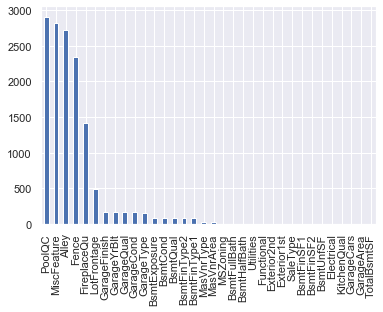

In [4]:
##show missing values in training
missing = EDA_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending=False)
print(missing)
missing.plot.bar()

df_missing=pd.DataFrame(missing)
df_missing.nunique()
print('Number of variables missing data:',len(df_missing))

In [5]:
##Values Dropped due to mossing data
EDA_train.drop(['FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageArea', 'GarageCond', 'PoolQC', 
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtHalfBath', 'BsmtFinSF1', 
                'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'Functional', 'MSZoning', 'GarageYrBlt'],axis=1,inplace=True)

In [6]:
##Numerical values filled with zero
EDA_train['LotFrontage'].fillna(0, inplace =True)
EDA_train['MasVnrArea'].fillna(0, inplace =True)
EDA_train['TotalBsmtSF'].fillna(0, inplace =True)

##Categorical variables filled with N
EDA_train['Alley'].fillna('N', inplace =True)
EDA_train['Utilities'].fillna('N', inplace =True)
EDA_train['Exterior1st'].fillna('N', inplace =True)
EDA_train['Exterior2nd'].fillna('N', inplace =True)
EDA_train['MasVnrType'].fillna('N', inplace =True)
EDA_train['Electrical'].fillna('N', inplace =True)
EDA_train['KitchenQual'].fillna('N', inplace =True)
EDA_train['GarageType'].fillna('N', inplace =True)
EDA_train['Fence'].fillna('N', inplace =True)
EDA_train['MiscFeature'].fillna('N', inplace =True)

##Categorical variables filled with Oth to denote other type of sale
EDA_train['SaleType'].fillna('Oth', inplace =True)

In [7]:
##show missing values in training
missing = EDA_train.isnull().sum()
missing = missing[missing > 0]

df_missing=pd.DataFrame(missing)
df_missing.nunique()
print('Number of variables missing data:',len(df_missing))

Number of variables missing data: 0


In [8]:
# Year from built to sold
EDA_train["Year_built_to_sold"] = np.maximum(EDA_train["YrSold"] - EDA_train["YearBuilt"], 0)
EDA_train.drop('YearBuilt', axis=1, inplace=True)

# Year from remod to sold
EDA_train["Year_remod_to_sold"] = np.maximum(EDA_train["YrSold"] - EDA_train["YearRemodAdd"], 0)
EDA_train.drop('YearRemodAdd', axis=1, inplace=True)

# Drop remaining year columns
EDA_train.drop('YrSold', axis=1, inplace=True)

# Total area: basement + above ground
EDA_train["TotalArea"] = EDA_train["TotalBsmtSF"] + EDA_train["GrLivArea"]

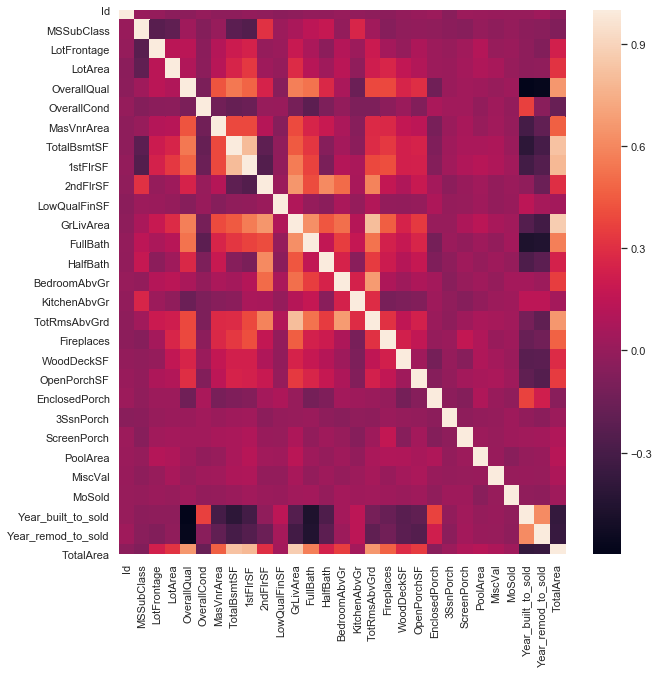

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(EDA_train.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000F57D732B08>,
      dtype=object)

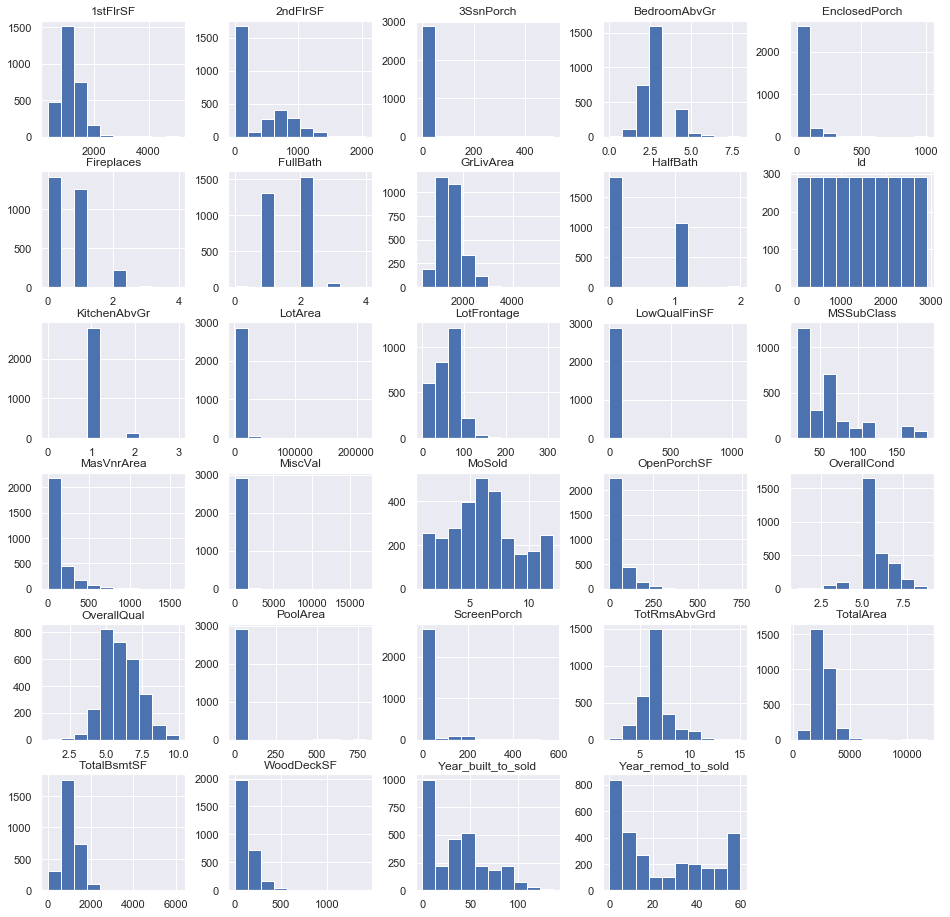

In [10]:
num_df = EDA_train.select_dtypes('number')
num_df.hist(figsize=(16,16))

In [11]:
##Values Dropped due to no value gained, or highly irregular data
EDA_train.drop(['3SsnPorch', 'LotArea', 'MiscVal', 'PoolArea', 'ScreenPorch', 
                'LowQualFinSF', 'OpenPorchSF', 'EnclosedPorch'],axis=1,inplace=True)

## Analysis of SalePrice

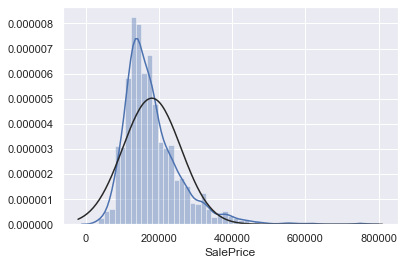

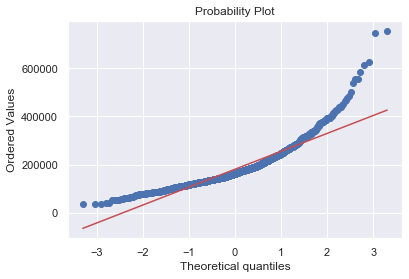

In [12]:
#histogram and normal probability plot
sns.distplot(y_train,fit=norm);
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)

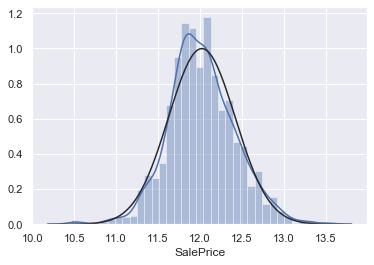

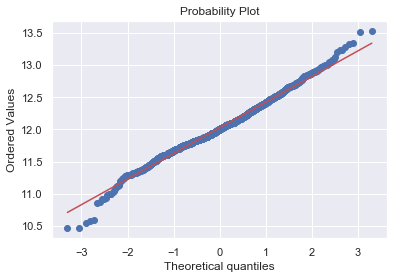

In [13]:
## Log transform SalePrice
y_train= np.log(y_train)
sns.distplot(y_train,fit=norm);
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)

## Transform Variables and Add Custom Features

In [14]:
from sklearn import preprocessing

def encode_features(data):
    data.drop(['FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageArea', 'GarageCond', 'PoolQC', 
               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtHalfBath', 'BsmtFinSF1', 
               'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'Functional', 'MSZoning', 'GarageYrBlt','3SsnPorch',
               'LotArea', 'MiscVal', 'PoolArea', 'ScreenPorch', 'LowQualFinSF', 'OpenPorchSF', 'EnclosedPorch'],
              axis=1,inplace=True)
    ##Numerical values filled with zero
    data['LotFrontage'].fillna(0, inplace =True)
    data['MasVnrArea'].fillna(0, inplace =True)
    data['TotalBsmtSF'].fillna(0, inplace =True)

    ##Categorical variables filled with N
    data['Alley'].fillna('N', inplace =True)
    data['Utilities'].fillna('N', inplace =True)
    data['Exterior1st'].fillna('N', inplace =True)
    data['Exterior2nd'].fillna('N', inplace =True)
    data['MasVnrType'].fillna('N', inplace =True)
    data['Electrical'].fillna('N', inplace =True)
    data['KitchenQual'].fillna('N', inplace =True)
    data['GarageType'].fillna('N', inplace =True)
    data['Fence'].fillna('N', inplace =True)
    data['MiscFeature'].fillna('N', inplace =True)

    ##Categorical variables filled with Oth to denote other type of sale
    data['SaleType'].fillna('Oth', inplace =True)

    # Year from built to sold
    data["Year_built_to_sold"] = np.maximum(data["YrSold"] - data["YearBuilt"], 0)
    data.drop('YearBuilt', axis=1, inplace=True)

    # Year from remod to sold
    data["Year_remod_to_sold"] = np.maximum(data["YrSold"] - data["YearRemodAdd"], 0)
    data.drop('YearRemodAdd', axis=1, inplace=True)

    # Drop remaining year columns
    data.drop('YrSold', axis=1, inplace=True)

    # Total area: basement + above ground
    data["TotalArea"] = data["TotalBsmtSF"] + data["GrLivArea"]

    return data

df5 = raw_train.copy()

df = encode_features(df5)
df.head()

,Id,MSSubClass,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,PavedDrive,WoodDeckSF,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice,Year_built_to_sold,Year_remod_to_sold,TotalArea
0,1,60,65.0,Pave,N,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,856,GasA,Ex,Y,SBrkr,856,854,1710,2,1,3,1,Gd,8,0,Attchd,Y,0,N,N,2,WD,Normal,208500,5,5,2566
1,2,20,80.0,Pave,N,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,1262,GasA,Ex,Y,SBrkr,1262,0,1262,2,0,3,1,TA,6,1,Attchd,Y,298,N,N,5,WD,Normal,181500,31,31,2524
2,3,60,68.0,Pave,N,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,920,GasA,Ex,Y,SBrkr,920,866,1786,2,1,3,1,Gd,6,1,Attchd,Y,0,N,N,9,WD,Normal,223500,7,6,2706
3,4,70,60.0,Pave,N,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,3,1,Gd,7,1,Detchd,Y,0,N,N,2,WD,Abnorml,140000,91,36,2473
4,5,60,84.0,Pave,N,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,2,1,4,1,Gd,9,1,Attchd,Y,192,N,N,12,WD,Normal,250000,8,8,3343


In [15]:
df['SalePrice']=np.log(df['SalePrice'])
corr = df.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice             1.000000
OverallQual           0.817184
TotalArea             0.773277
GrLivArea             0.700927
TotalBsmtSF           0.612134
1stFlrSF              0.596981
FullBath              0.594771
TotRmsAbvGrd          0.534422
Fireplaces            0.489449
MasVnrArea            0.426775
WoodDeckSF            0.334135
2ndFlrSF              0.319300
HalfBath              0.313982
BedroomAbvGr          0.209044
LotFrontage           0.179303
MoSold                0.057329
Id                   -0.017942
OverallCond          -0.036868
MSSubClass           -0.073959
KitchenAbvGr         -0.147548
Year_remod_to_sold   -0.568149
Year_built_to_sold   -0.587290
Name: SalePrice, dtype: float64

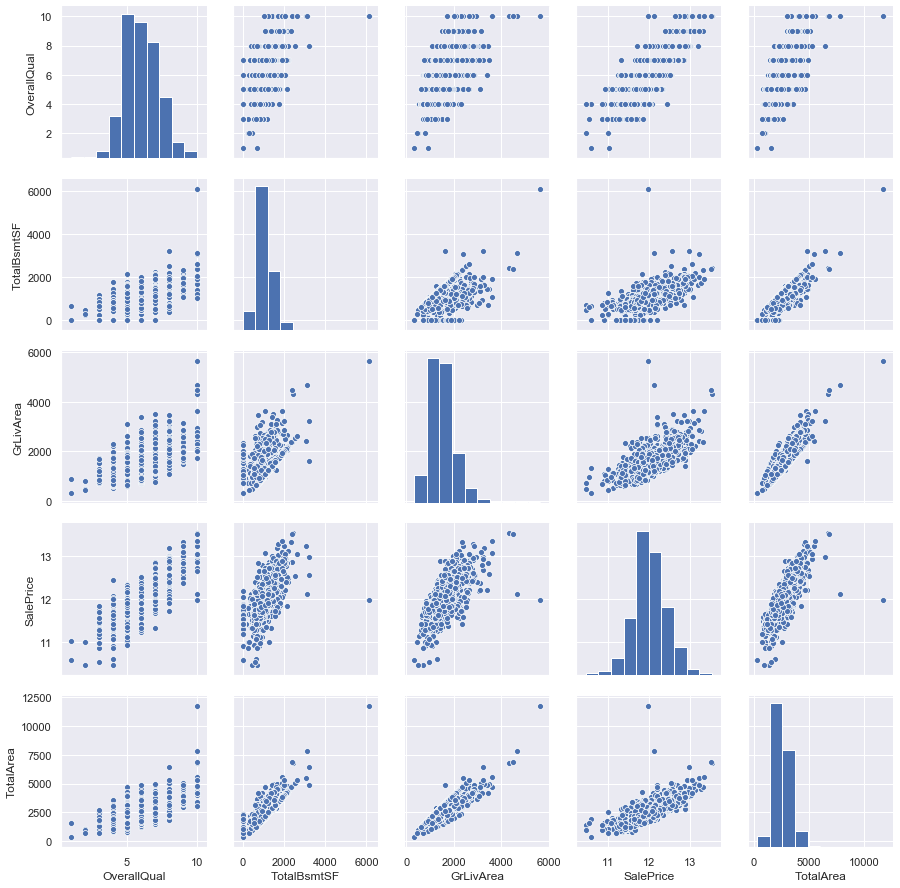

In [16]:
# Pairplot for those features with correlation >.6 search for outliers in the data
sns.pairplot(df[corr[corr['SalePrice'] > .6].index])

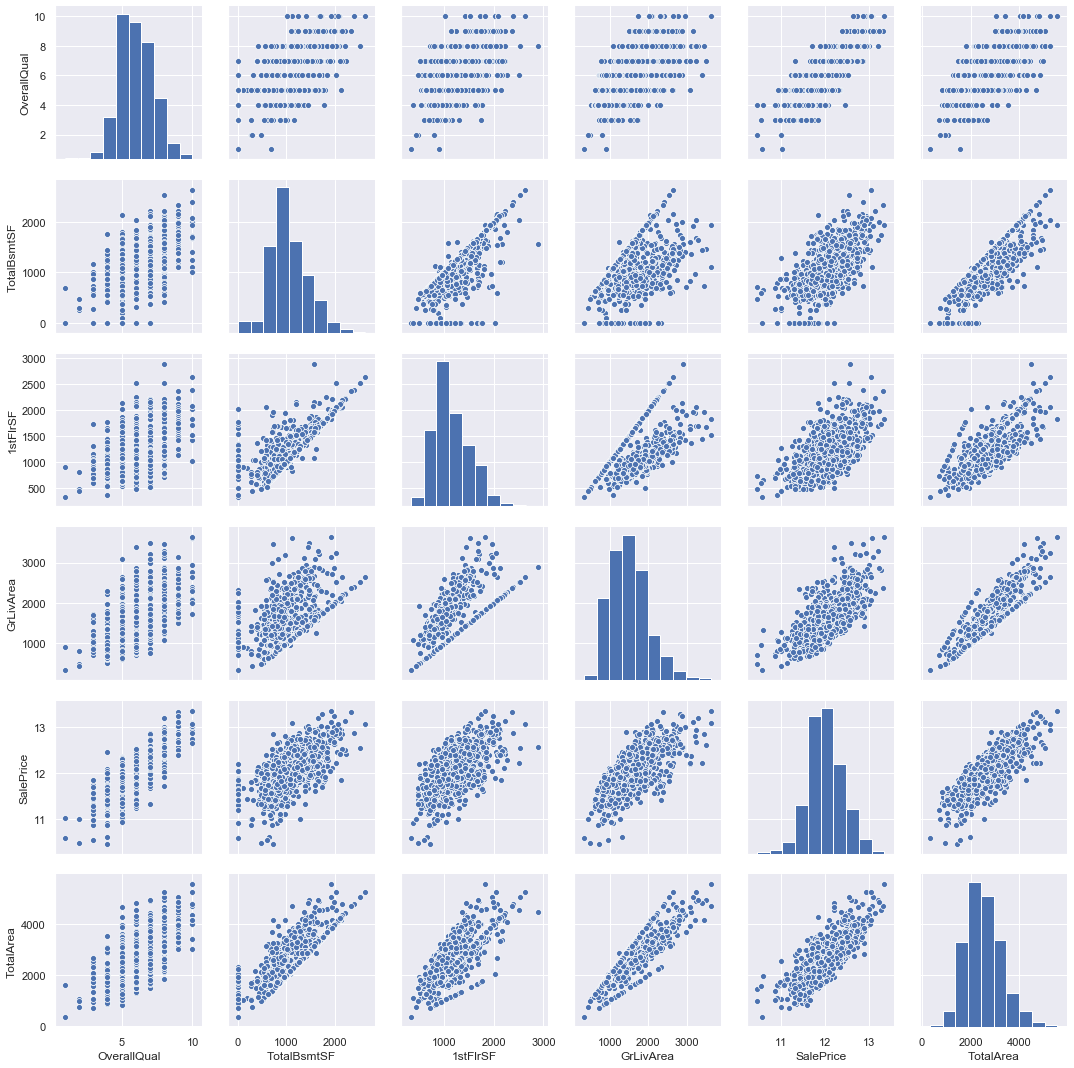

In [17]:
###Remove outlier found in the numerical data
df = df[df.GrLivArea< 4000]
df = df[df.TotalArea< 6000]
df = df[df.TotalBsmtSF< 3000]
corr = df.corr()
corr['SalePrice'].sort_values(ascending=False)
sns.pairplot(df[corr[corr['SalePrice'] > .6].index])

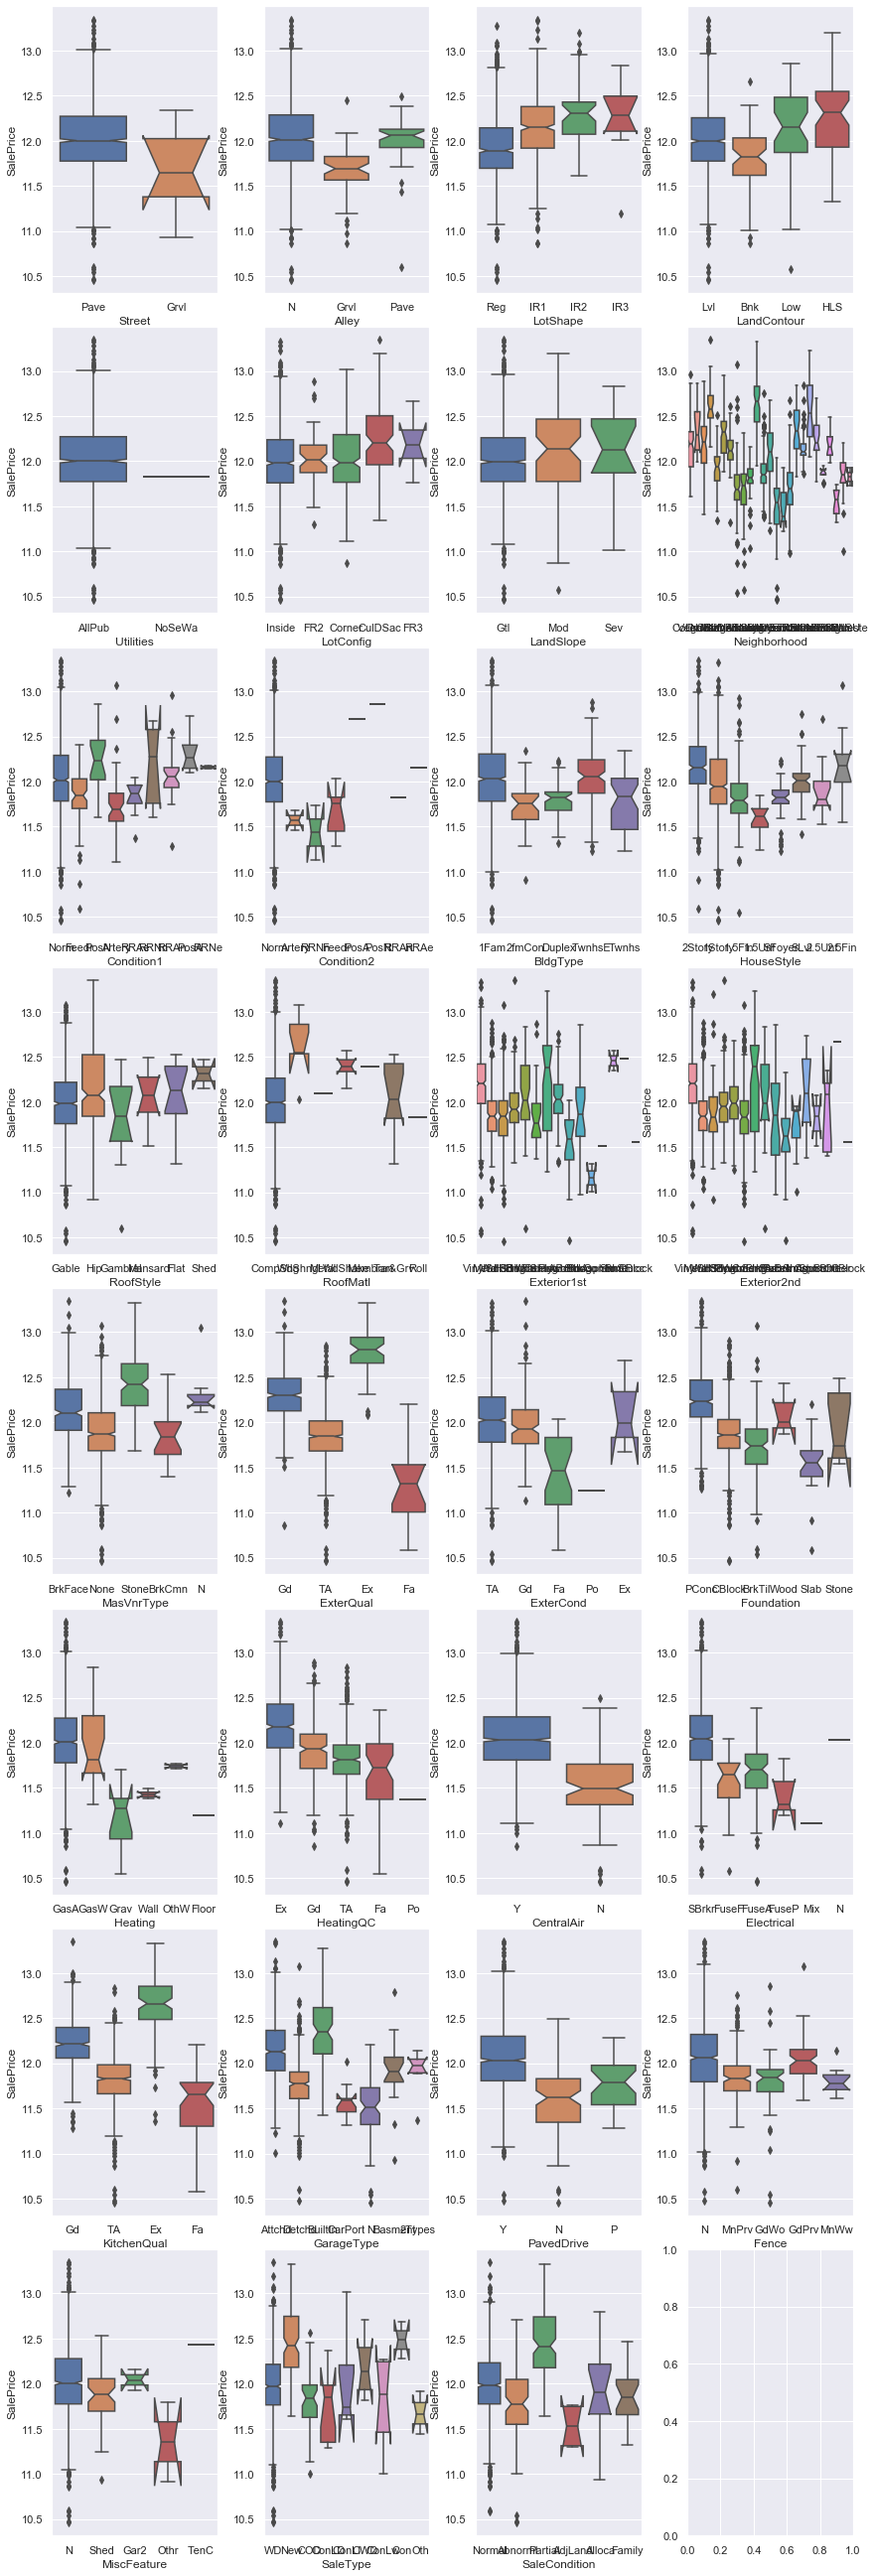

In [18]:
cat_df = df.select_dtypes('object')

# Check the independent variables (categorical) distributions
fig, axes = plt.subplots(8, 4, figsize=(12, 36))
fig.tight_layout()
axes = axes.reshape(-1)
# Plot
for i, col in enumerate(cat_df):
    sns.boxplot(x=col, y='SalePrice', data=df, ax=axes[i], notch=True) ##note look at the notches to make stat assumptions hold

In [160]:
cat_df.columns

Index(['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [20]:
###check for similar outliers in test data
df = encode_features(df4)

df6 = df[df.GrLivArea > 4000]
print(df6)
df7 = df[df.TotalArea > 6000]
print(df7)
df8 = df[df.TotalBsmtSF > 3000]
print(df8)

        Id  MSSubClass  LotFrontage Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
1089  2550          20        128.0   Pave     N      IR1         Bnk    AllPub    Inside       Gtl      Edwards       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
1089     1Story           10            5       Hip  CompShg     CemntBd     CmentBd      Stone      1224.0        Ex        TA      PConc   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1089       5095.0    GasA        Ex          Y      SBrkr      5095         0       5095         2         1             2             1   

     KitchenQual  TotRmsAbvGrd  Fireplaces GarageType PavedDrive  WoodDeckSF Fence MiscFeature  MoSold SaleType SaleCondition  Year_built_t

## Final Transformer

In [21]:
####Practice using encoder to transform categories into numbers
from sklearn import preprocessing

def trans_features(data):
    data.drop(['FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageArea', 'GarageCond', 'PoolQC', 
               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtHalfBath', 'BsmtFinSF1', 
               'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'Functional', 'MSZoning', 'GarageYrBlt','3SsnPorch',
               'LotArea', 'MiscVal', 'PoolArea', 'ScreenPorch', 'LowQualFinSF', 'OpenPorchSF', 'EnclosedPorch'],
              axis=1,inplace=True)
    ##Numerical values filled with zero
    data['LotFrontage'].fillna(0, inplace =True)
    data['MasVnrArea'].fillna(0, inplace =True)
    data['TotalBsmtSF'].fillna(0, inplace =True)

    ##Categorical variables filled with N
    data['Alley'].fillna('N', inplace =True)
    data['Utilities'].fillna('N', inplace =True)
    data['Exterior1st'].fillna('N', inplace =True)
    data['Exterior2nd'].fillna('N', inplace =True)
    data['MasVnrType'].fillna('N', inplace =True)
    data['Electrical'].fillna('N', inplace =True)
    data['KitchenQual'].fillna('N', inplace =True)
    data['GarageType'].fillna('N', inplace =True)
    data['Fence'].fillna('N', inplace =True)
    data['MiscFeature'].fillna('N', inplace =True)

    ##Categorical variables filled with Oth to denote other type of sale
    data['SaleType'].fillna('Oth', inplace =True)

    # Year from built to sold
    data["Year_built_to_sold"] = np.maximum(data["YrSold"] - data["YearBuilt"], 0)
    data.drop('YearBuilt', axis=1, inplace=True)

    # Year from remod to sold
    data["Year_remod_to_sold"] = np.maximum(data["YrSold"] - data["YearRemodAdd"], 0)
    data.drop('YearRemodAdd', axis=1, inplace=True)

    # Drop remaining year columns
    data.drop('YrSold', axis=1, inplace=True)

    # Total area: basement + above ground
    data["TotalArea"] = data["TotalBsmtSF"] + data["GrLivArea"]
    
    features =['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
               'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
               'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
               'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
               'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(data[feature])
        data[feature] = le.transform(data[feature])

    return data

## Create and Transforming Training Data

In [22]:
# Make a copy to avoid modifying the original dataset
df3 = raw_train.copy()
df4 = raw_test.copy()
# Make the Id column as index
df3.set_index('Id', inplace=True)
df4.set_index('Id', inplace=True)

In [23]:
df3 = trans_features(df3)

In [24]:
df3.head()

,MSSubClass,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,PavedDrive,WoodDeckSF,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice,Year_built_to_sold,Year_remod_to_sold,TotalArea
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,1,1,3,3,0,4,0,5,2,2,0,5,7,5,1,1,12,13,1,196.0,2,4,2,856,1,0,1,5,856,854,1710,2,1,3,1,2,8,0,1,2,0,4,1,2,8,4,208500,5,5,2566
2,20,80.0,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1,1,8,8,3,0.0,3,4,1,1262,1,0,1,5,1262,0,1262,2,0,3,1,3,6,1,1,2,298,4,1,5,8,4,181500,31,31,2524
3,60,68.0,1,1,0,3,0,4,0,5,2,2,0,5,7,5,1,1,12,13,1,162.0,2,4,2,920,1,0,1,5,920,866,1786,2,1,3,1,2,6,1,1,2,0,4,1,9,8,4,223500,7,6,2706
4,70,60.0,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1,1,13,15,3,0.0,3,4,0,756,1,2,1,5,961,756,1717,1,0,3,1,2,7,1,5,2,0,4,1,2,8,0,140000,91,36,2473
5,60,84.0,1,1,0,3,0,2,0,15,2,2,0,5,8,5,1,1,12,13,1,350.0,2,4,2,1145,1,0,1,5,1145,1053,2198,2,1,4,1,2,9,1,1,2,192,4,1,12,8,4,250000,8,8,3343


In [25]:
### splitting the testing and training data
train_set, test_set = train_test_split(df3, test_size = 0.2, random_state = 1234)

In [26]:
X_train= train_set.drop('SalePrice', axis = 1)

###Keep the dependent variable separate
y_train = np.array(np.log1p(train_set['SalePrice']))

X_test= test_set.drop('SalePrice', axis = 1)

###Keep the dependent variable separate
y_test = np.array(np.log1p(test_set['SalePrice']))

# check to make sure the dataset looks right
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)  

(1168, 51) (1168,) (292, 51) (292,)


In [27]:
###Define Error measure as RMSE with 10 fold cross validation
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

## Linear Regression

In [28]:
### Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print(lr.coef_.mean())
print(lr.intercept_)

print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())

0.0047144480269291624
10.68338155953722
RMSE on Training set : 0.15764026215163462
RMSE on Test set : 0.18009926350925837


### Ridge

In [29]:
###Ridge Regression
ridge = Ridge(alpha=1, solver="cholesky")
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print(ridge.coef_.mean())
print(ridge.intercept_)

print("RMSE on Training set :", rmse_cv_train(ridge).mean())
print("RMSE on Test set :", rmse_cv_test(ridge).mean())

0.0059251242338021134
10.687312487637358
RMSE on Training set : 0.15746970888679512
RMSE on Test set : 0.17246694209250096


### Lasso

In [30]:
###Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print(lasso.coef_.mean())
print(lasso.intercept_)
print("RMSE on Training set :", rmse_cv_train(lasso).mean())
print("RMSE on Test set :", rmse_cv_test(lasso).mean())

-0.0001307815554221175
11.558153810015336
RMSE on Training set : 0.19089317397330396
RMSE on Test set : 0.19376724106332208


### Elastic Net

In [31]:
###Elastic Net
elastic_net= ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)

print(elastic_net.coef_.mean())
print(elastic_net.intercept_)
print("RMSE on Training set :", rmse_cv_train(elastic_net).mean())
print("RMSE on Test set :", rmse_cv_test(elastic_net).mean())

0.000571458899768278
11.394398182377039
RMSE on Training set : 0.17930863839215605
RMSE on Test set : 0.18053045815927488


### Random Forest

In [32]:
features=np.log2(len(X_train.columns))
print(features)

5.672425341971495


In [33]:
features=6
estimators=100

forest=RandomForestRegressor(n_estimators=estimators, max_features=features)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

print("RMSE on Training set :", rmse_cv_train(forest).mean())
print("RMSE on Test set :", rmse_cv_test(forest).mean())

RMSE on Training set : 0.13785216091041724
RMSE on Test set : 0.17474916924657993


In [34]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False)

,Gini-importance
TotalArea,0.141009
OverallQual,0.123644
Year_built_to_sold,0.097640
GrLivArea,0.067283
1stFlrSF,0.052322
TotalBsmtSF,0.045275
Year_remod_to_sold,0.044435
GarageType,0.043328
ExterQual,0.043230
FullBath,0.031083


### Gradient Boosting

In [35]:
features=6
estimators=100

Grad=GradientBoostingRegressor(n_estimators=estimators, max_features=features)
Grad.fit(X_train, y_train)
Grad_pred = Grad.predict(X_test)

print("RMSE on Training set :", rmse_cv_train(Grad).mean())
print("RMSE on Test set :", rmse_cv_test(Grad).mean())

RMSE on Training set : 0.13472275452154836
RMSE on Test set : 0.16559391474576945


In [36]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, Grad.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False)

,Gini-importance
TotalArea,0.152671
OverallQual,0.140726
Year_built_to_sold,0.090163
FullBath,0.070970
Year_remod_to_sold,0.064437
GarageType,0.063259
GrLivArea,0.050767
1stFlrSF,0.047202
Fireplaces,0.045841
HeatingQC,0.045082


### Extra Trees

In [37]:
features=6
estimators=100

Extra=ExtraTreesRegressor(n_estimators=estimators, max_features=features)
Extra.fit(X_train, y_train)
Extra_pred = Extra.predict(X_test)

print("RMSE on Training set :", rmse_cv_train(Extra).mean())
print("RMSE on Test set :", rmse_cv_test(Extra).mean())

RMSE on Training set : 0.1386754182826319
RMSE on Test set : 0.1690924107677078


In [38]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, Extra.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False)

,Gini-importance
OverallQual,0.093443
TotalArea,0.070347
ExterQual,0.058756
GrLivArea,0.058050
KitchenQual,0.055560
Year_built_to_sold,0.048817
Year_remod_to_sold,0.048038
GarageType,0.046431
Fireplaces,0.043322
FullBath,0.039829


## Compare Results

In [39]:
print("---------------------Training Results---------------------")
print("Linear RMSE on Training set :", rmse_cv_train(lr).mean())
print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Elastic RMSE on Training set :", rmse_cv_train(elastic_net).mean())
print("Forest RMSE on Training set :", rmse_cv_train(forest).mean())
print("Grad RMSE on Training set :", rmse_cv_train(Grad).mean())
print("Extra RMSE on Training set :", rmse_cv_train(Extra).mean())
print("---------------------Training Results---------------------")
print("Linear RMSE on Test set :", rmse_cv_test(lr).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
print("Elastic RMSE on Test set :", rmse_cv_test(elastic_net).mean())
print("ForestRMSE on Test set :", rmse_cv_test(forest).mean())
print("Grad RMSE on Test set :", rmse_cv_test(Grad).mean())
print("Extra RMSE on Test set :", rmse_cv_test(Extra).mean())

print("----------------------------------------------------------")
print("The Two models we will use are Grad and Extra")

---------------------Training Results---------------------
Linear RMSE on Training set : 0.15764026215163462
Ridge RMSE on Training set : 0.15746970888679512
Lasso RMSE on Training set : 0.19089317397330396
Elastic RMSE on Training set : 0.17930863839215605
Forest RMSE on Training set : 0.13793801300139372
Grad RMSE on Training set : 0.13398098185946455
Extra RMSE on Training set : 0.137977147892247
---------------------Training Results---------------------
Linear RMSE on Test set : 0.18009926350925837
Ridge RMSE on Test set : 0.17246694209250096
Lasso RMSE on Test set : 0.19376724106332208
Elastic RMSE on Test set : 0.18053045815927488
ForestRMSE on Test set : 0.17151986618425036
Grad RMSE on Test set : 0.15977403181901131
Extra RMSE on Test set : 0.17327505308689153
----------------------------------------------------------
The Two models we will use are Grad and Extra


## Export Results

In [40]:
# Applying Transformations To Kaggle Testing Data
df4 = trans_features(df4)

In [41]:
# Getting predictions for submission Gradient Boosting
Grad_predictions = np.expm1(Grad.predict(df4))

In [42]:
# Getting predictions for submission Extra Random Forest
Extra_predictions = np.expm1(Extra.predict(df4))

In [43]:
# Packaging submission up for logistic regression
my_solution = pd.DataFrame(Grad_predictions,df4.index, columns = ['SalePrice'])
my_solution.to_csv("submission_1.csv")

In [44]:
# Packaging submission up for Naive bayes
my_solution = pd.DataFrame(Extra_predictions, df4.index, columns = ['SalePrice'])
my_solution.to_csv("submission_2.csv")